# import 库

In [1]:
import sys
print("Python version: {}". format(sys.version))

import pandas as pd
print("pandas version: {}". format(pd.__version__))

import matplotlib
print("matplotlib version: {}". format(matplotlib.__version__))

import numpy as np
print("NumPy version: {}". format(np.__version__))

import scipy as sp
print("SciPy version: {}". format(sp.__version__)) 

import IPython
from IPython import display
print("IPython version: {}". format(IPython.__version__)) 

import sklearn
print("scikit-learn version: {}". format(sklearn.__version__))

import random
import time


import warnings
warnings.filterwarnings('ignore')
print('-'*25)

from subprocess import check_output

Python version: 3.9.18 (main, Sep 11 2023, 14:09:26) [MSC v.1916 64 bit (AMD64)]
pandas version: 2.2.1
matplotlib version: 3.8.3
NumPy version: 1.26.4
SciPy version: 1.12.0
IPython version: 8.18.1
scikit-learn version: 1.4.1.post1
-------------------------


In [2]:
# 算法模型
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from xgboost import XGBClassifier

from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics

# 可视化
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
from pandas.plotting import scatter_matrix



mpl.style.use('ggplot')
sns.set_style('white')
pylab.rcParams['figure.figsize'] = 12,8

# 加载数据

In [3]:

data_raw = pd.read_csv('./data/train.csv')

data_val  = pd.read_csv('./data/test.csv')


# 操作data1
data1 = data_raw.copy(deep = True)

data_cleaner = [data1, data_val]


print (data_raw.info())
#data_raw.head() 
#data_raw.tail() 
data_raw.sample(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
831,832,1,2,"Richards, Master. George Sibley",male,0.83,1,1,29106,18.7500,NaN,S
758,759,0,3,"Theobald, Mr. Thomas Leonard",male,34.00,0,0,363294,8.0500,NaN,S
420,421,0,3,"Gheorgheff, Mr. Stanio",male,NaN,0,0,349254,7.8958,NaN,C
642,643,0,3,"Skoog, Miss. Margit Elizabeth",female,2.00,3,2,347088,27.9000,NaN,S
359,360,1,3,"Mockler, Miss. Helen Mary ""Ellie""",female,NaN,0,0,330980,7.8792,NaN,Q
191,192,0,2,"Carbines, Mr. William",male,19.00,0,0,28424,13.0000,NaN,S
476,477,0,2,"Renouf, Mr. Peter Henry",male,34.00,1,0,31027,21.0000,NaN,S
477,478,0,3,"Braund, Mr. Lewis Richard",male,29.00,1,0,3460,7.0458,NaN,S
85,86,1,3,"Backstrom, Mrs. Karl Alfred (Maria Mathilda Gu...",female,33.00,3,0,3101278,15.8500,NaN,S
832,833,0,3,"Saad, Mr. Amin",male,NaN,0,0,2671,7.2292,NaN,C


# 数据清洗

In [4]:
print('训练集含有空值的列:\n', data1.isnull().sum())
print("-"*10)

print('测试集含有空值的列:\n', data_val.isnull().sum())
print("-"*10)

data_raw.describe(include = 'all')

训练集含有空值的列:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
----------
测试集含有空值的列:
 PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64
----------


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [5]:
# 处理缺失值

for dataset in data_cleaner:    
    # 年龄使用均值填充
    dataset['Age'].fillna(dataset['Age'].median(), inplace = True)

    # Embarked 使用众数填充
    dataset['Embarked'].fillna(dataset['Embarked'].mode()[0], inplace = True)

    # Fare 使用中位数填充
    dataset['Fare'].fillna(dataset['Fare'].median(), inplace = True)
    
# 删除cabin列, PassengerId列, Ticket列
drop_column = ['PassengerId','Cabin', 'Ticket']
data1.drop(drop_column, axis=1, inplace = True)

print(data1.isnull().sum())
print("-"*10)
print(data_val.isnull().sum())

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64
----------
PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64


# 特征工程

In [6]:
# 特征工程

for dataset in data_cleaner:    
    # 在船上的家庭人口数            兄弟姐妹      +     父母孩子      + 自己
    dataset['FamilySize'] = dataset ['SibSp'] + dataset['Parch'] + 1

    # 是否独自出行
    dataset['IsAlone'] = 1
    dataset['IsAlone'].loc[dataset['FamilySize'] > 1] = 0

    # Miss. Mr. Mrs. Master. Dr. 等等
    dataset['Title'] = dataset['Name'].str.split(", ", expand=True)[1].str.split(".", expand=True)[0]

    # 票价分为4个区间
    dataset['FareBin'] = pd.qcut(dataset['Fare'], 4)

    # 年龄分为5个区间
    dataset['AgeBin'] = pd.cut(dataset['Age'].astype(int), 5)



stat_min = 10
title_names = (data1['Title'].value_counts() < stat_min)


# 比较稀少的Title(出现次数<10), 统称为Misc
data1['Title'] = data1['Title'].apply(lambda x: 'Misc' if title_names.loc[x] == True else x)
print(data1['Title'].value_counts())
print("-"*10)


data1.info()
data_val.info()
data1.sample(10)

Title
Mr        517
Miss      182
Mrs       125
Master     40
Misc       27
Name: count, dtype: int64
----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Survived    891 non-null    int64   
 1   Pclass      891 non-null    int64   
 2   Name        891 non-null    object  
 3   Sex         891 non-null    object  
 4   Age         891 non-null    float64 
 5   SibSp       891 non-null    int64   
 6   Parch       891 non-null    int64   
 7   Fare        891 non-null    float64 
 8   Embarked    891 non-null    object  
 9   FamilySize  891 non-null    int64   
 10  IsAlone     891 non-null    int64   
 11  Title       891 non-null    object  
 12  FareBin     891 non-null    category
 13  AgeBin      891 non-null    category
dtypes: category(2), float64(2), int64(6), object(4)
memory usage: 85.9+ KB
<class 'pandas.core.frame.DataFram

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone,Title,FareBin,AgeBin
93,0,3,"Dean, Mr. Bertram Frank",male,26.0,1,2,20.5750,S,4,0,Mr,"(14.454, 31.0]","(16.0, 32.0]"
504,1,1,"Maioni, Miss. Roberta",female,16.0,0,0,86.5000,S,1,1,Miss,"(31.0, 512.329]","(-0.08, 16.0]"
316,1,2,"Kantor, Mrs. Sinai (Miriam Sternin)",female,24.0,1,0,26.0000,S,2,0,Mrs,"(14.454, 31.0]","(16.0, 32.0]"
31,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,28.0,1,0,146.5208,C,2,0,Mrs,"(31.0, 512.329]","(16.0, 32.0]"
614,0,3,"Brocklebank, Mr. William Alfred",male,35.0,0,0,8.0500,S,1,1,Mr,"(7.91, 14.454]","(32.0, 48.0]"
183,1,2,"Becker, Master. Richard F",male,1.0,2,1,39.0000,S,4,0,Master,"(31.0, 512.329]","(-0.08, 16.0]"
651,1,2,"Doling, Miss. Elsie",female,18.0,0,1,23.0000,S,2,0,Miss,"(14.454, 31.0]","(16.0, 32.0]"
210,0,3,"Ali, Mr. Ahmed",male,24.0,0,0,7.0500,S,1,1,Mr,"(-0.001, 7.91]","(16.0, 32.0]"
662,0,1,"Colley, Mr. Edward Pomeroy",male,47.0,0,0,25.5875,S,1,1,Mr,"(14.454, 31.0]","(32.0, 48.0]"
549,1,2,"Davies, Master. John Morgan Jr",male,8.0,1,1,36.7500,S,3,0,Master,"(31.0, 512.329]","(-0.08, 16.0]"


In [7]:
# 数据转换

# 转换为类别数据

label = LabelEncoder()
for dataset in data_cleaner:    
    dataset['Sex_Code'] = label.fit_transform(dataset['Sex'])
    dataset['Embarked_Code'] = label.fit_transform(dataset['Embarked'])
    dataset['Title_Code'] = label.fit_transform(dataset['Title'])
    dataset['AgeBin_Code'] = label.fit_transform(dataset['AgeBin'])
    dataset['FareBin_Code'] = label.fit_transform(dataset['FareBin'])


# 目标变量
Target = ['Survived']

# 原始选择
data1_x = ['Sex','Pclass', 'Embarked', 'Title','SibSp', 'Parch', 'Age', 'Fare', 'FamilySize', 'IsAlone']    # 绘图用的特征
data1_x_calc = ['Sex_Code','Pclass', 'Embarked_Code', 'Title_Code','SibSp', 'Parch', 'Age', 'Fare']         # 算法用的特征
data1_xy =  Target + data1_x
print('Original X Y: ', data1_xy, '\n')


# 连续变量直接分块 特征
data1_x_bin = ['Sex_Code','Pclass', 'Embarked_Code', 'Title_Code', 'FamilySize', 'AgeBin_Code', 'FareBin_Code']
data1_xy_bin = Target + data1_x_bin
print('Bin X Y: ', data1_xy_bin, '\n')


# 独热编码特征
data1_dummy = pd.get_dummies(data1[data1_x])
data1_x_dummy = data1_dummy.columns.tolist()
data1_xy_dummy = Target + data1_x_dummy
print('Dummy X Y: ', data1_xy_dummy, '\n')



data1_dummy.head()

Original X Y:  ['Survived', 'Sex', 'Pclass', 'Embarked', 'Title', 'SibSp', 'Parch', 'Age', 'Fare', 'FamilySize', 'IsAlone'] 

Bin X Y:  ['Survived', 'Sex_Code', 'Pclass', 'Embarked_Code', 'Title_Code', 'FamilySize', 'AgeBin_Code', 'FareBin_Code'] 

Dummy X Y:  ['Survived', 'Pclass', 'SibSp', 'Parch', 'Age', 'Fare', 'FamilySize', 'IsAlone', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Title_Master', 'Title_Misc', 'Title_Miss', 'Title_Mr', 'Title_Mrs'] 



,Pclass,SibSp,Parch,Age,Fare,FamilySize,IsAlone,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Misc,Title_Miss,Title_Mr,Title_Mrs
0,3,1,0,22.0,7.2500,2,0,False,True,False,False,True,False,False,False,True,False
1,1,1,0,38.0,71.2833,2,0,True,False,True,False,False,False,False,False,False,True
2,3,0,0,26.0,7.9250,1,1,True,False,False,False,True,False,False,True,False,False
3,1,1,0,35.0,53.1000,2,0,True,False,False,False,True,False,False,False,False,True
4,3,0,0,35.0,8.0500,1,1,False,True,False,False,True,False,False,False,True,False


In [8]:
# 查看一下

print('训练集空值数量: \n', data1.isnull().sum())
print("-"*10)
print (data1.info())
print("-"*10)

print('测试集空值数量: \n', data_val.isnull().sum())
print("-"*10)
print (data_val.info())
print("-"*10)

data_raw.describe(include = 'all')

训练集空值数量: 
 Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Fare             0
Embarked         0
FamilySize       0
IsAlone          0
Title            0
FareBin          0
AgeBin           0
Sex_Code         0
Embarked_Code    0
Title_Code       0
AgeBin_Code      0
FareBin_Code     0
dtype: int64
----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Survived       891 non-null    int64   
 1   Pclass         891 non-null    int64   
 2   Name           891 non-null    object  
 3   Sex            891 non-null    object  
 4   Age            891 non-null    float64 
 5   SibSp          891 non-null    int64   
 6   Parch          891 non-null    int64   
 7   Fare           891 non-null    float64 
 8   Embarked       891 non-null    object  
 9  

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [9]:
# 分割数据集


train1_x, test1_x, train1_y, test1_y = model_selection.train_test_split(data1[data1_x_calc], data1[Target], random_state = 0)

train1_x_bin, test1_x_bin, train1_y_bin, test1_y_bin = model_selection.train_test_split(data1[data1_x_bin], data1[Target] , random_state = 0)

train1_x_dummy, test1_x_dummy, train1_y_dummy, test1_y_dummy = model_selection.train_test_split(data1_dummy[data1_x_dummy], data1[Target], random_state = 0)


print("Data1 Shape: {}".format(data1.shape))
print("Train1 Shape: {}".format(train1_x.shape))
print("Test1 Shape: {}".format(test1_x.shape))

train1_x_bin.head()

Data1 Shape: (891, 19)
Train1 Shape: (668, 8)
Test1 Shape: (223, 8)


,Sex_Code,Pclass,Embarked_Code,Title_Code,FamilySize,AgeBin_Code,FareBin_Code
105,1,3,2,3,1,1,0
68,0,3,2,2,7,1,1
253,1,3,2,3,2,1,2
320,1,3,2,3,1,1,0
706,0,2,2,4,1,2,1


# 数据探索

In [10]:
# 离散变量的相关性

for x in data1_x:
    if data1[x].dtype != 'float64' :
        print(f'存活 & {x} 的相关性')
        print(data1[[x, Target[0]]].groupby(x, as_index=False).mean())
        print('-'*10, '\n')
        

print(pd.crosstab(data1['Title'],data1[Target[0]]))

存活 & Sex 的相关性
      Sex  Survived
0  female  0.742038
1    male  0.188908
---------- 

存活 & Pclass 的相关性
   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363
---------- 

存活 & Embarked 的相关性
  Embarked  Survived
0        C  0.553571
1        Q  0.389610
2        S  0.339009
---------- 

存活 & Title 的相关性
    Title  Survived
0  Master  0.575000
1    Misc  0.444444
2    Miss  0.697802
3      Mr  0.156673
4     Mrs  0.792000
---------- 

存活 & SibSp 的相关性
   SibSp  Survived
0      0  0.345395
1      1  0.535885
2      2  0.464286
3      3  0.250000
4      4  0.166667
5      5  0.000000
6      8  0.000000
---------- 

存活 & Parch 的相关性
   Parch  Survived
0      0  0.343658
1      1  0.550847
2      2  0.500000
3      3  0.600000
4      4  0.000000
5      5  0.200000
6      6  0.000000
---------- 

存活 & FamilySize 的相关性
   FamilySize  Survived
0           1  0.303538
1           2  0.552795
2           3  0.578431
3           4  0.724138
4           5  0.200000
5          

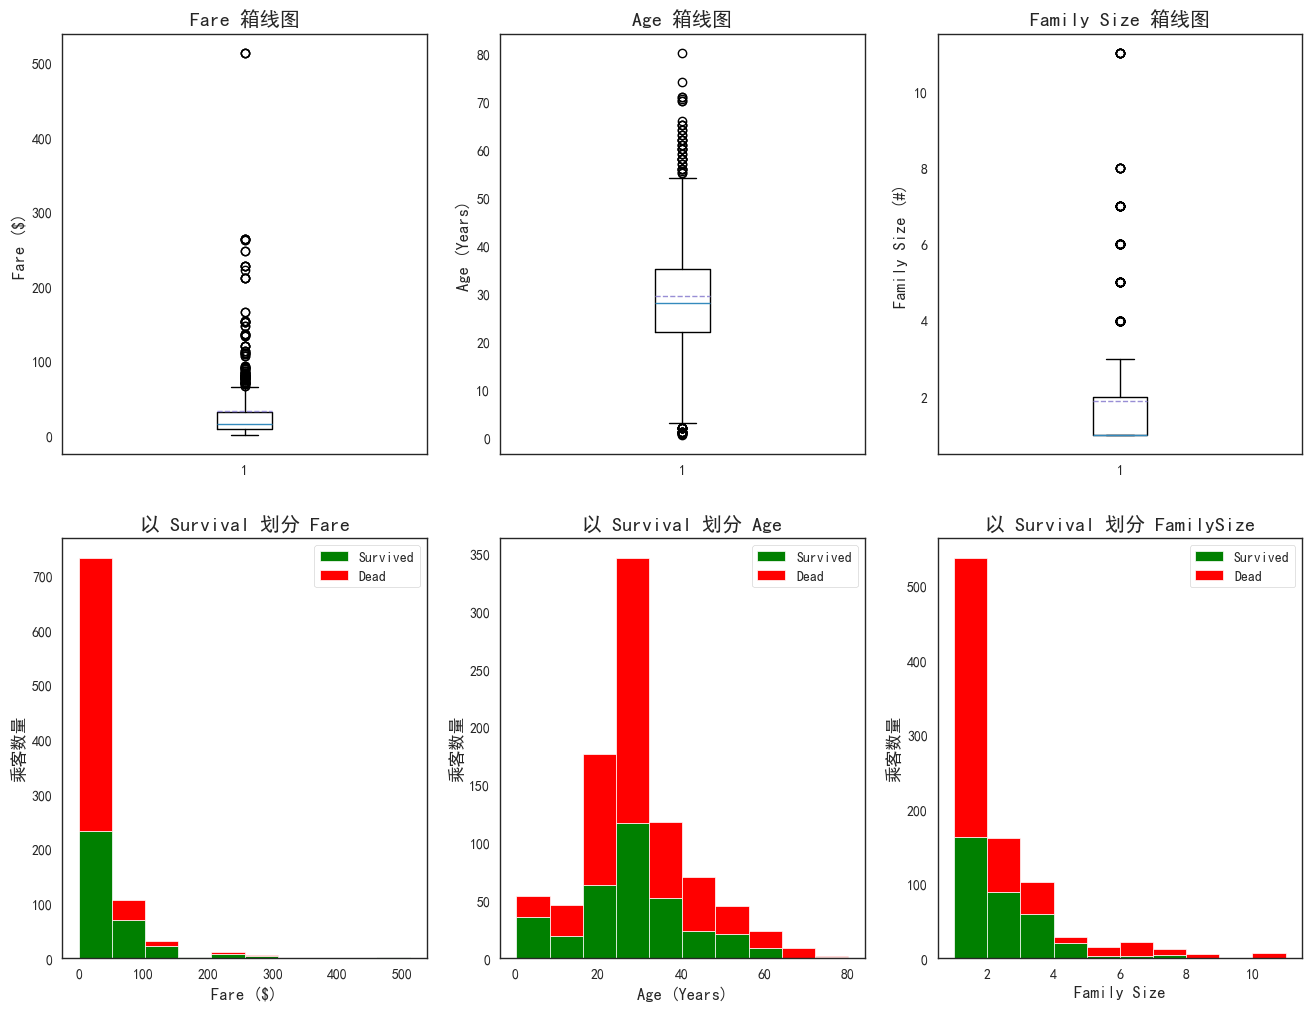

In [11]:
# 可视化

plt.rcParams['font.sans-serif'] = ['SimHei'] # 中文显示

plt.figure(figsize=[16,12])

plt.subplot(231)
plt.boxplot(x=data1['Fare'], showmeans = True, meanline = True)
plt.title('Fare 箱线图')
plt.ylabel('Fare ($)')

plt.subplot(232)
plt.boxplot(data1['Age'], showmeans = True, meanline = True)
plt.title('Age 箱线图')
plt.ylabel('Age (Years)')

plt.subplot(233)
plt.boxplot(data1['FamilySize'], showmeans = True, meanline = True)
plt.title('Family Size 箱线图')
plt.ylabel('Family Size (#)')

plt.subplot(234)
plt.hist(x = [data1[data1['Survived']==1]['Fare'], data1[data1['Survived']==0]['Fare']], 
         stacked=True, color = ['g','r'],label = ['Survived','Dead'])
plt.title('以 Survival 划分 Fare')
plt.xlabel('Fare ($)')
plt.ylabel('乘客数量')
plt.legend()

plt.subplot(235)
plt.hist(x = [data1[data1['Survived']==1]['Age'], data1[data1['Survived']==0]['Age']], 
         stacked=True, color = ['g','r'],label = ['Survived','Dead'])
plt.title('以 Survival 划分 Age')
plt.xlabel('Age (Years)')
plt.ylabel('乘客数量')
plt.legend()

plt.subplot(236)
plt.hist(x = [data1[data1['Survived']==1]['FamilySize'], data1[data1['Survived']==0]['FamilySize']], 
         stacked=True, color = ['g','r'],label = ['Survived','Dead'])
plt.title('以 Survival 划分 FamilySize')
plt.xlabel('Family Size')
plt.ylabel('乘客数量')
plt.legend()

plt.show()

Text(0.5, 1.0, 'Pclass vs Family Size: 存活对比')

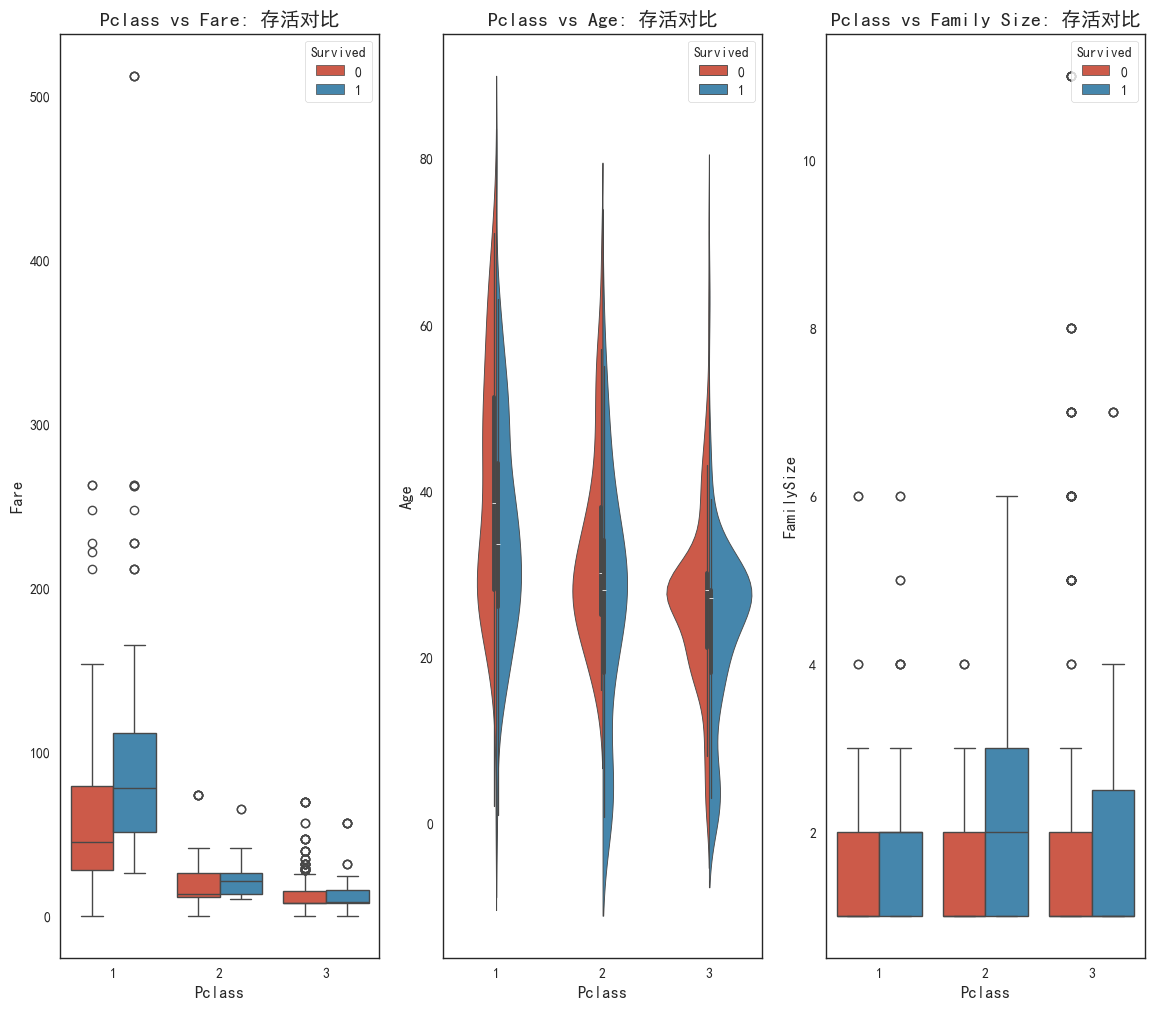

In [12]:

fig, (axis1,axis2,axis3) = plt.subplots(1,3,figsize=(14,12))

sns.boxplot(x = 'Pclass', y = 'Fare', hue = 'Survived', data = data1, ax = axis1)
axis1.set_title('Pclass vs Fare: 存活对比')

sns.violinplot(x = 'Pclass', y = 'Age', hue = 'Survived', data = data1, split = True, ax = axis2)
axis2.set_title('Pclass vs Age: 存活对比')

sns.boxplot(x = 'Pclass', y ='FamilySize', hue = 'Survived', data = data1, ax = axis3)
axis3.set_title('Pclass vs Family Size: 存活对比')

Text(0.5, 1.0, 'Sex vs IsAlone: 存活对比')

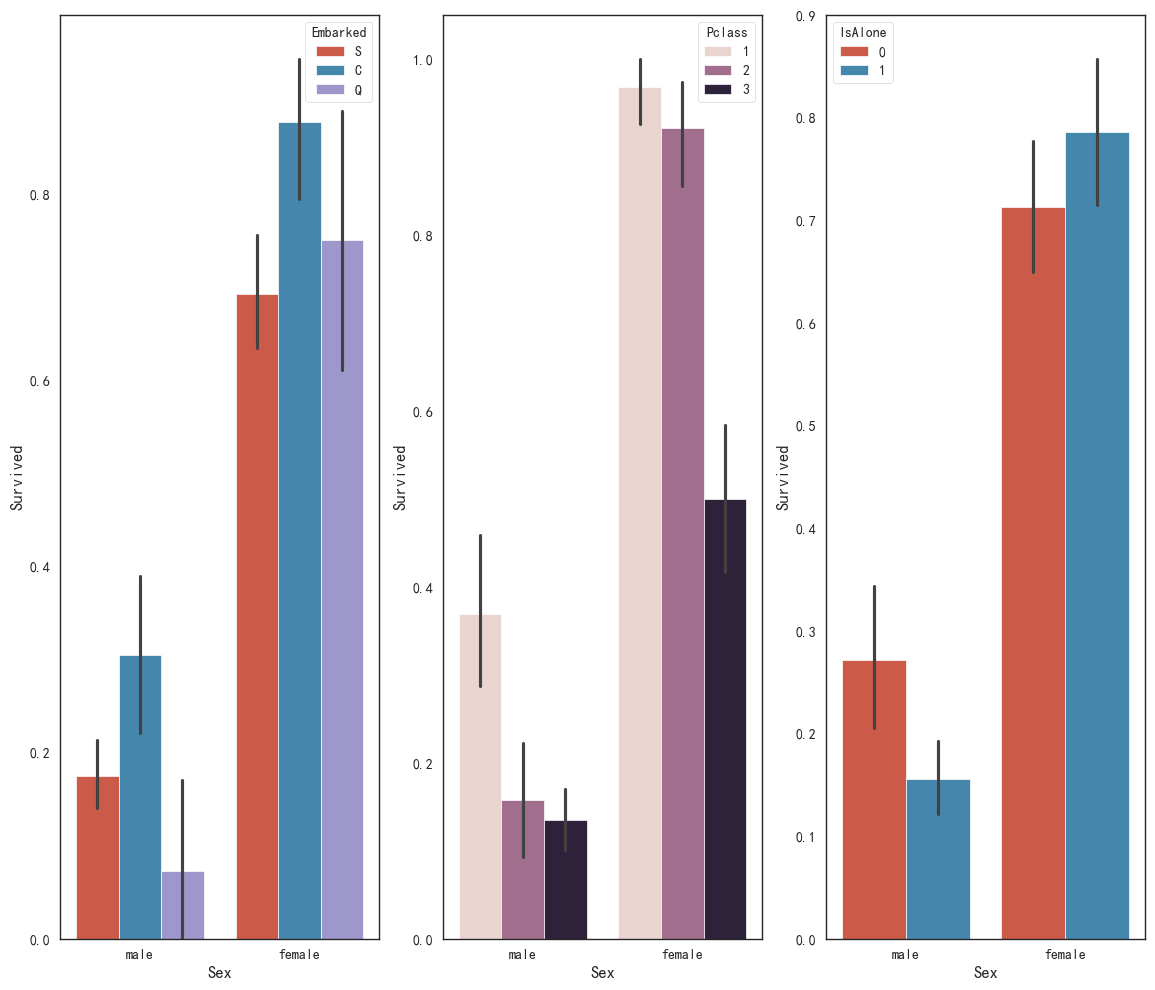

In [13]:
fig, qaxis = plt.subplots(1,3,figsize=(14,12))

sns.barplot(x = 'Sex', y = 'Survived', hue = 'Embarked', data=data1, ax = qaxis[0])
axis1.set_title('Sex vs Embarked: 存活对比')

sns.barplot(x = 'Sex', y = 'Survived', hue = 'Pclass', data=data1, ax  = qaxis[1])
axis1.set_title('Sex vs Pclass: 存活对比')

sns.barplot(x = 'Sex', y = 'Survived', hue = 'IsAlone', data=data1, ax  = qaxis[2])
axis1.set_title('Sex vs IsAlone: 存活对比')

<Axes: xlabel='Pclass', ylabel='Survived'>

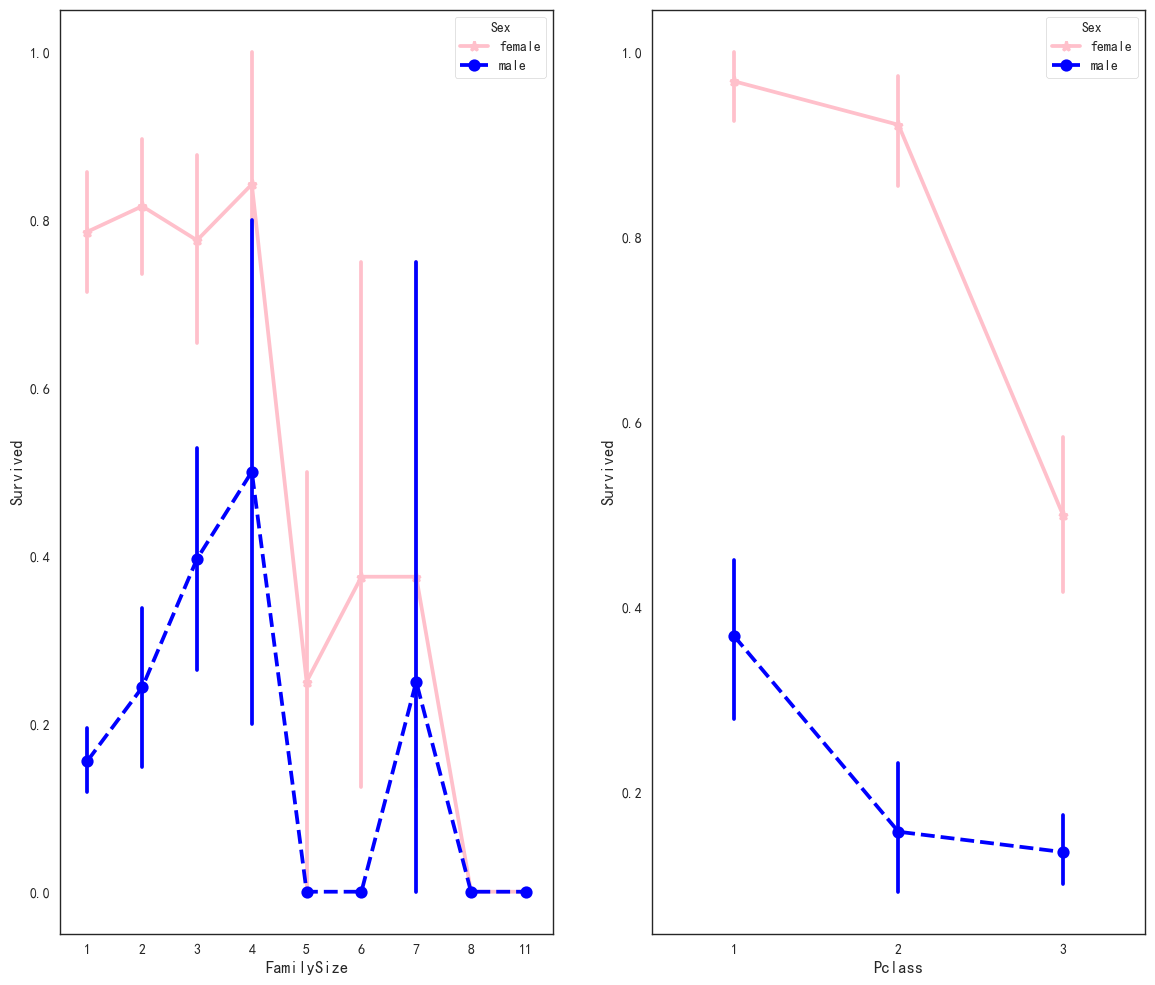

In [14]:

fig, (maxis1, maxis2) = plt.subplots(1, 2,figsize=(14,12))

# 家庭人数与性别和生存率的比较
sns.pointplot(x="FamilySize", y="Survived", hue="Sex", data=data1,
              palette={"male": "blue", "female": "pink"},
              markers=["*", "o"], linestyles=["-", "--"], ax = maxis1)

#舱级与性别和生存率的比较
sns.pointplot(x="Pclass", y="Survived", hue="Sex", data=data1,
              palette={"male": "blue", "female": "pink"},
              markers=["*", "o"], linestyles=["-", "--"], ax = maxis2)

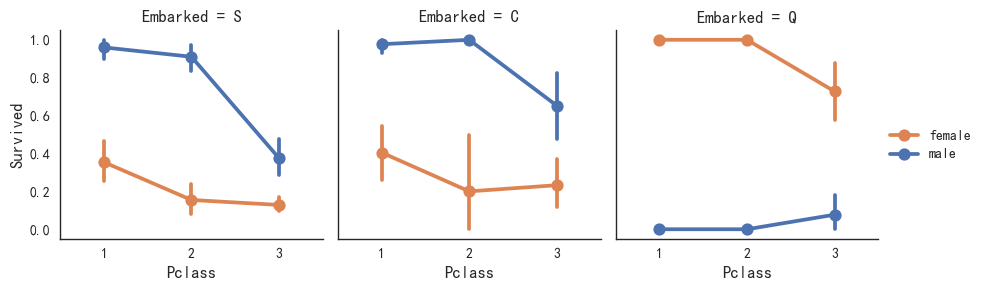

In [15]:
# 舱级和性别
e = sns.FacetGrid(data1, col = 'Embarked')
e.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', ci=95.0, palette = 'deep')
e.add_legend()

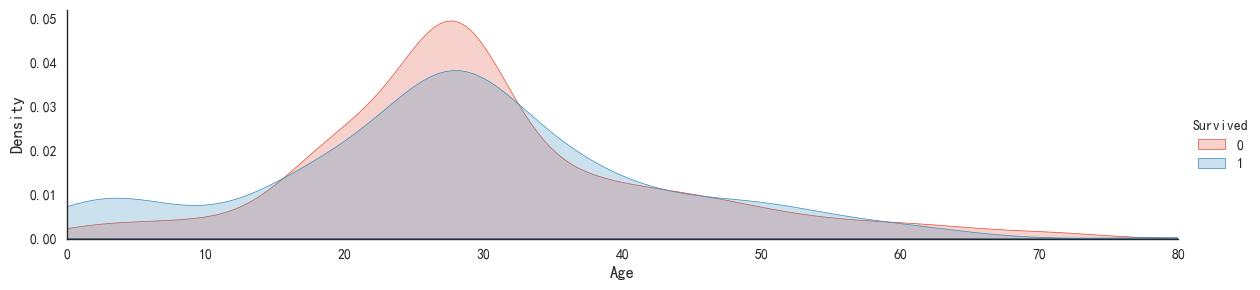

In [16]:
# 年龄密度图

a = sns.FacetGrid( data1, hue = 'Survived', aspect=4 )
a.map(sns.kdeplot, 'Age', shade= True )
a.set(xlim=(0 , data1['Age'].max()))
a.add_legend()

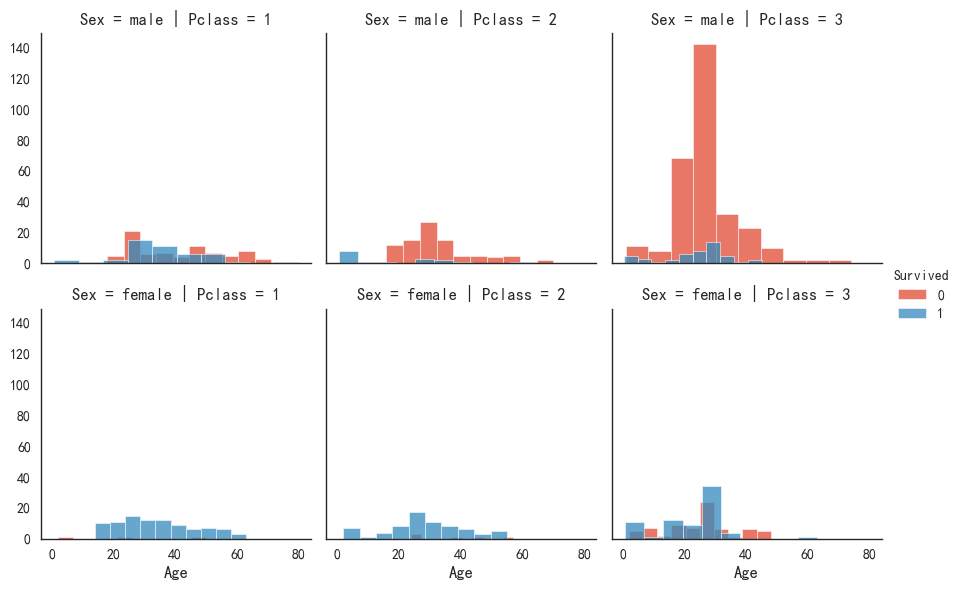

In [17]:
# 按生存率划分的性别、舱级和年龄 直方图比较
h = sns.FacetGrid(data1, row = 'Sex', col = 'Pclass', hue = 'Survived')
h.map(plt.hist, 'Age', alpha = .75)
h.add_legend()

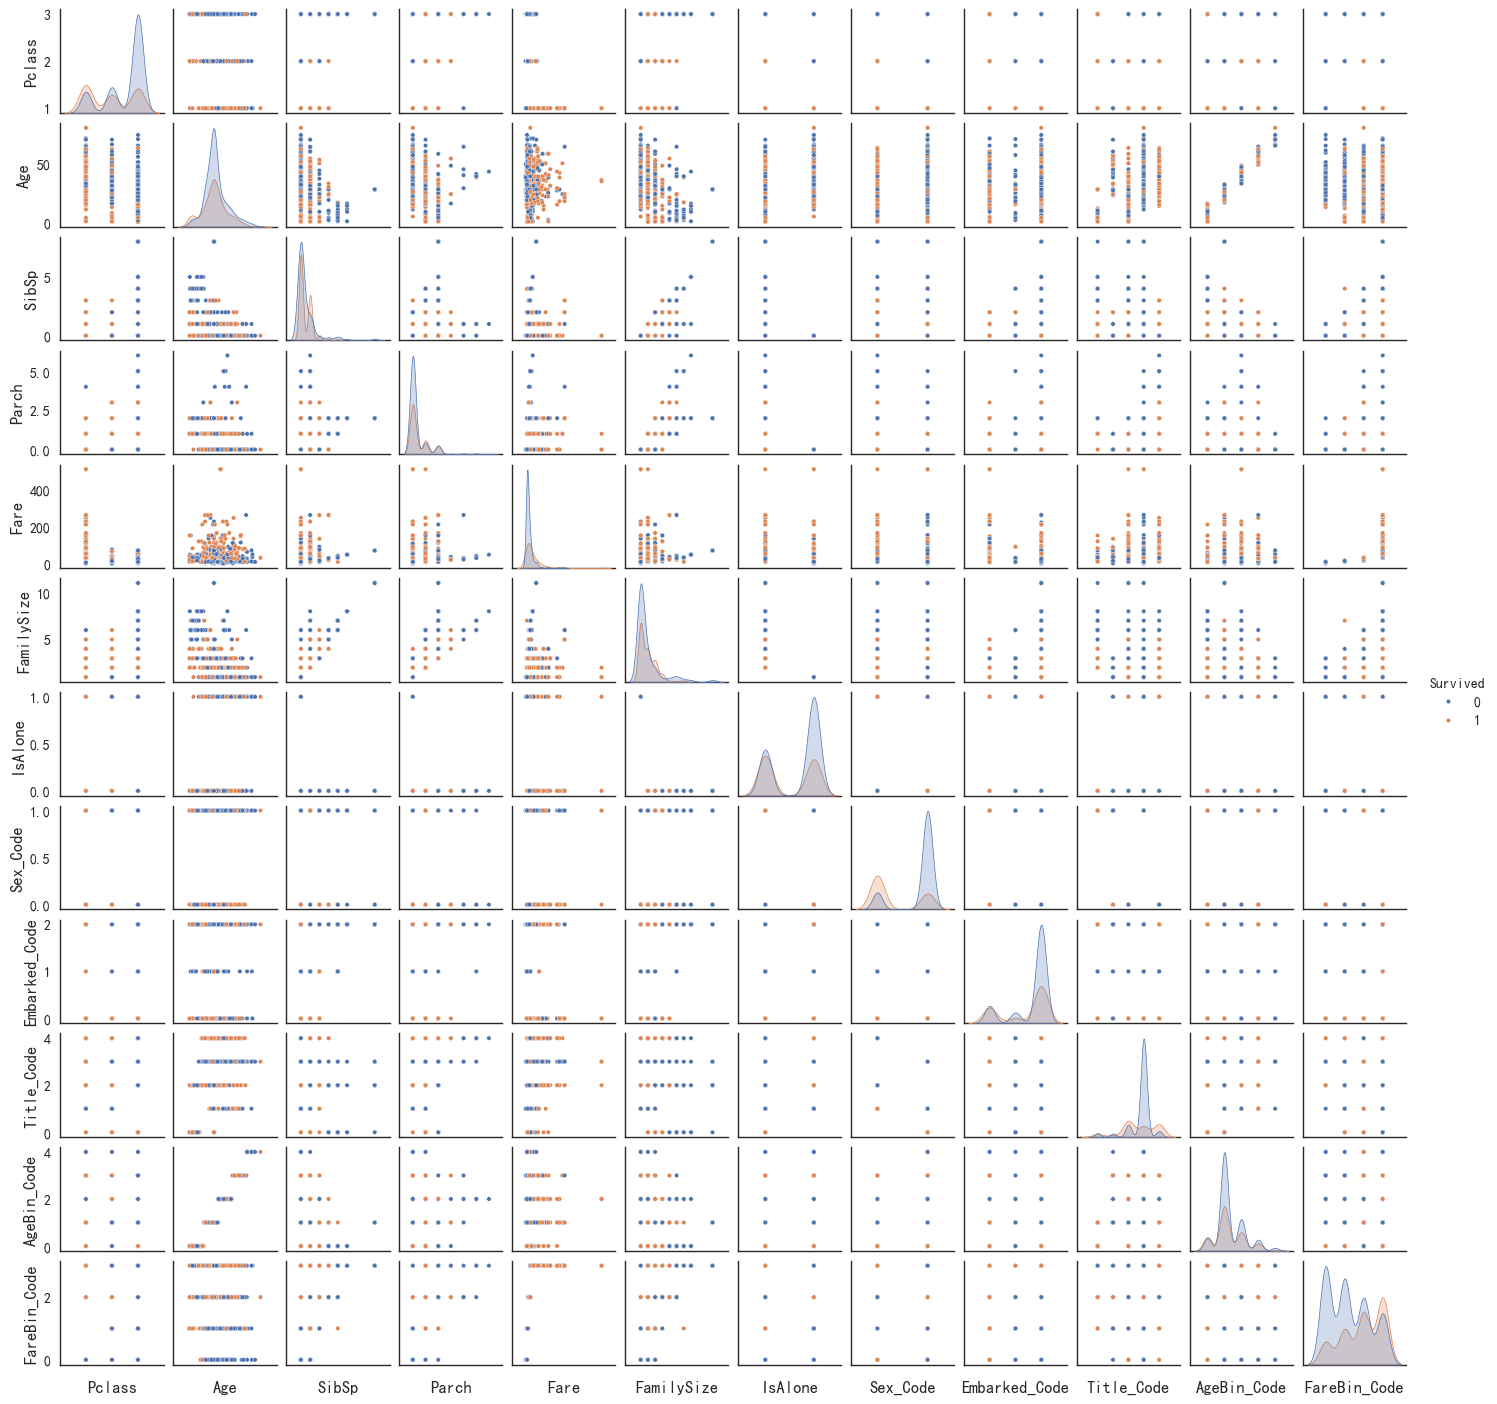

In [18]:
# 特征一一匹配
pp = sns.pairplot(data1, hue = 'Survived', palette = 'deep', size=1.2, diag_kind = 'kde', diag_kws=dict(shade=True), plot_kws=dict(s=10) )
pp.set(xticklabels=[])

# 数据建模

In [19]:
# Machine Learning Algorithm (机器学习算法 MLA)  选择和初始化

MLA = [
    # 继承方法
    ensemble.AdaBoostClassifier(),
    ensemble.BaggingClassifier(),
    ensemble.ExtraTreesClassifier(),
    ensemble.GradientBoostingClassifier(),
    ensemble.RandomForestClassifier(),

    # 高斯过程
    gaussian_process.GaussianProcessClassifier(),
    
    # 线性模型
    linear_model.LogisticRegressionCV(),
    linear_model.PassiveAggressiveClassifier(),
    linear_model.RidgeClassifierCV(),
    linear_model.SGDClassifier(),
    linear_model.Perceptron(),
    
    # 朴素贝叶斯
    naive_bayes.BernoulliNB(),
    naive_bayes.GaussianNB(),
    
    # KNN
    neighbors.KNeighborsClassifier(),
    
    # SVM
    svm.SVC(probability=True),
    svm.NuSVC(probability=True),
    svm.LinearSVC(),
    
    # Trees    
    tree.DecisionTreeClassifier(),
    tree.ExtraTreeClassifier(),
    
    # 判别分析
    discriminant_analysis.LinearDiscriminantAnalysis(),
    discriminant_analysis.QuadraticDiscriminantAnalysis(),

    
    # xgboost
    XGBClassifier()    
    ]



# 划分数据集 ShuffleSplit or train_test_split
cv_split = model_selection.ShuffleSplit(n_splits = 10, test_size = .3, train_size = .6, random_state = 0 ) # 10折交叉验证

# 对比 MLAs
MLA_columns = ['算法名', '算法参数','训练集 Accuracy Mean', '测试集 Accuracy Mean', '测试集 Accuracy 3σ' ,'耗时']
MLA_compare = pd.DataFrame(columns = MLA_columns)


MLA_predict = data1[Target]


row_index = 0
for alg in MLA:

    # 算法名 算法参数
    MLA_name = alg.__class__.__name__
    MLA_compare.loc[row_index, '算法名'] = MLA_name
    MLA_compare.loc[row_index, '算法参数'] = str(alg.get_params())
    
    cv_results = model_selection.cross_validate(alg, data1[data1_x_bin], data1[Target], cv  = cv_split, return_train_score=True)

    MLA_compare.loc[row_index, '耗时'] = cv_results['fit_time'].mean()
    MLA_compare.loc[row_index, '训练集 Accuracy Mean'] = cv_results['train_score'].mean()
    MLA_compare.loc[row_index, '测试集 Accuracy Mean'] = cv_results['test_score'].mean()   
    MLA_compare.loc[row_index, '测试集 Accuracy 3σ'] = cv_results['test_score'].std() * 3
    
    alg.fit(data1[data1_x_bin], data1[Target])
    MLA_predict[MLA_name] = alg.predict(data1[data1_x_bin])
    
    row_index+=1


# 根据测试集的平均精确度排序
MLA_compare.sort_values(by = ['测试集 Accuracy Mean'], ascending = False, inplace = True)
MLA_compare


,算法名,算法参数,训练集 Accuracy Mean,测试集 Accuracy Mean,测试集 Accuracy 3σ,耗时
14,SVC,"{'C': 1.0, 'break_ties': False, 'cache_size': ...",0.835206,0.827612,0.040916,0.023852
21,XGBClassifier,"{'objective': 'binary:logistic', 'base_score':...",0.890824,0.826866,0.054656,0.035108
15,NuSVC,"{'break_ties': False, 'cache_size': 200, 'clas...",0.834082,0.826119,0.045663,0.138082
2,ExtraTreesClassifier,"{'bootstrap': False, 'ccp_alpha': 0.0, 'class_...",0.895131,0.823881,0.062886,0.053218
4,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",0.895131,0.823881,0.051004,0.067606
3,GradientBoostingClassifier,"{'ccp_alpha': 0.0, 'criterion': 'friedman_mse'...",0.866667,0.822761,0.049873,0.057266
17,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",0.895131,0.820896,0.04905,0.001697
1,BaggingClassifier,"{'bootstrap': True, 'bootstrap_features': Fals...",0.889888,0.813433,0.063125,0.011474
0,AdaBoostClassifier,"{'algorithm': 'SAMME.R', 'estimator': None, 'l...",0.820412,0.81194,0.049861,0.041101
5,GaussianProcessClassifier,"{'copy_X_train': True, 'kernel': None, 'max_it...",0.871723,0.810448,0.049254,0.121262


Text(0, 0.5, '算法')

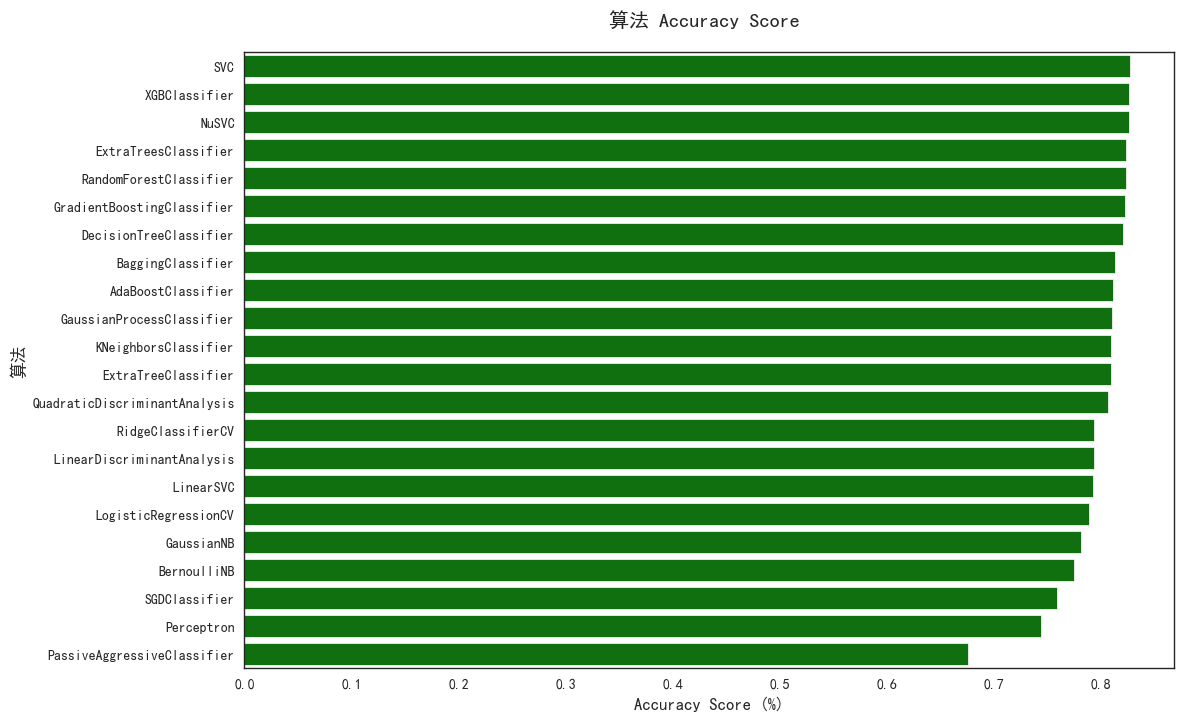

In [20]:
sns.barplot(x='测试集 Accuracy Mean', y = '算法名', data = MLA_compare, color = 'g')

plt.title('算法 Accuracy Score \n')
plt.xlabel('Accuracy Score (%)')
plt.ylabel('算法')

## 超参数微调

决策树

决策树的一些优点包括：
1. 简单易懂、易解释。决策树可以可视化。
2. 需要较少的数据准备工作。与其他技术相比，决策树通常不需要数据归一化，也不需要创建虚拟变量或删除空白值。但请注意，该模块不支持缺失值。
3. 使用决策树进行预测的成本（即，预测数据）与用于训练树的数据点数量的对数成正比。
4. 能够处理数值和分类数据。其他技术通常专门用于分析只包含一种类型变量的数据集。详见算法部分了解更多信息。
5. 能够处理多输出问题。
6. 使用白盒模型。如果模型中存在给定情况，则该情况的解释很容易通过布尔逻辑解释。相比之下，在黑盒模型（例如，人工神经网络）中，结果可能更难解释。
7. 可以使用统计测试验证模型。这使得能够考虑模型的可靠性。
7. 即使数据真实模型违反了一些假设，决策树仍能表现良好。


决策树的一些缺点包括：
1. 决策树学习器可能创建过于复杂的树，无法很好地泛化数据。这称为过拟合。为避免这个问题，需要机制如修剪（目前不支持）、设置叶节点所需的最小样本数或设置树的最大深度。
2. 决策树可能不稳定，因为数据的轻微变化可能导致生成完全不同的树。通过在集成学习中使用决策树来缓解这个问题。
3. 学习最优决策树的问题在几个方面被认为是NP完全的，甚至对于简单的概念也是如此。因此，实际的决策树学习算法基于启发式算法，例如贪婪算法，在每个节点上做出局部最优决策。这样的算法不能保证返回全局最优的决策树。通过在集成学习器中训练多个树，并对特征和样本进行随机替换来缓解这个问题。
5. 有一些概念很难学习，因为决策树不容易表达这些概念，例如异或、奇偶或多路复用器问题。
6. 如果某些类别占主导地位，决策树学习器会创建偏斜的树。因此，在使用决策树拟合前，建议平衡数据集。


超参数:
```py
class sklearn.tree.DecisionTreeClassifier(criterion=’gini’, splitter=’best’, max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, class_weight=None, presort=False)
```

In [21]:
# 基准模型

dtree = tree.DecisionTreeClassifier(random_state = 0)
base_results = model_selection.cross_validate(dtree, data1[data1_x_bin], data1[Target], cv  = cv_split, return_train_score=True)
dtree.fit(data1[data1_x_bin], data1[Target])

print('BEFORE DT Parameters: ', dtree.get_params())
print("BEFORE DT Training w/bin score mean: {:.2f}". format(base_results['train_score'].mean()*100)) 
print("BEFORE DT Test w/bin score mean: {:.2f}". format(base_results['test_score'].mean()*100))
print("BEFORE DT Test w/bin score 3*std: +/- {:.2f}". format(base_results['test_score'].std()*100*3))
print('-'*10)


# 微调超参数
param_grid = {
    'criterion': ['gini', 'entropy'],
    #'splitter': ['best', 'random'],
    'max_depth': [2,4,6,8,10,None],
    #'min_samples_split': [2,5,10,.03,.05],
    #'min_samples_leaf': [1,5,10,.03,.05],
    #'max_features': [None, 'auto'],
    'random_state': [0]
}


tune_model = model_selection.GridSearchCV(tree.DecisionTreeClassifier(), param_grid=param_grid, scoring='roc_auc', cv=cv_split, return_train_score=True)
tune_model.fit(data1[data1_x_bin], data1[Target])


print('AFTER DT Parameters: ', tune_model.best_params_)
print("AFTER DT Training w/bin score mean: {:.2f}". format(tune_model.cv_results_['mean_train_score'][tune_model.best_index_]*100)) 
print("AFTER DT Test w/bin score mean: {:.2f}". format(tune_model.cv_results_['mean_test_score'][tune_model.best_index_]*100))
print("AFTER DT Test w/bin score 3*std: +/- {:.2f}". format(tune_model.cv_results_['std_test_score'][tune_model.best_index_]*100*3))
print('-'*10)

BEFORE DT Parameters:  {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': 0, 'splitter': 'best'}
BEFORE DT Training w/bin score mean: 89.51
BEFORE DT Test w/bin score mean: 82.09
BEFORE DT Test w/bin score 3*std: +/- 5.57
----------
AFTER DT Parameters:  {'criterion': 'gini', 'max_depth': 4, 'random_state': 0}
AFTER DT Training w/bin score mean: 89.35
AFTER DT Test w/bin score mean: 87.40
AFTER DT Test w/bin score 3*std: +/- 5.00
----------


## 特征选择微调

In [22]:
# 基准模型
print('BEFORE DT RFE Training Shape Old: ', data1[data1_x_bin].shape) 
print('BEFORE DT RFE Training Columns Old: ', data1[data1_x_bin].columns.values)
print("BEFORE DT RFE Training w/bin score mean: {:.2f}". format(base_results['train_score'].mean()*100)) 
print("BEFORE DT RFE Test w/bin score mean: {:.2f}". format(base_results['test_score'].mean()*100))
print("BEFORE DT RFE Test w/bin score 3*std: +/- {:.2f}". format(base_results['test_score'].std()*100*3))
print('-'*10)


# 特征选择 (递归特征消除)
dtree_rfe = feature_selection.RFECV(dtree, step = 1, scoring = 'accuracy', cv = cv_split)
dtree_rfe.fit(data1[data1_x_bin], data1[Target])


X_rfe = data1[data1_x_bin].columns.values[dtree_rfe.get_support()]
rfe_results = model_selection.cross_validate(dtree, data1[X_rfe], data1[Target], cv  = cv_split, return_train_score=True)


print('AFTER DT RFE Training Shape New: ', data1[X_rfe].shape) 
print('AFTER DT RFE Training Columns New: ', X_rfe)
print("AFTER DT RFE Training w/bin score mean: {:.2f}". format(rfe_results['train_score'].mean()*100)) 
print("AFTER DT RFE Test w/bin score mean: {:.2f}". format(rfe_results['test_score'].mean()*100))
print("AFTER DT RFE Test w/bin score 3*std: +/- {:.2f}". format(rfe_results['test_score'].std()*100*3))
print('-'*10)


rfe_tune_model = model_selection.GridSearchCV(tree.DecisionTreeClassifier(), param_grid=param_grid, scoring = 'roc_auc', cv = cv_split, return_train_score=True)
rfe_tune_model.fit(data1[X_rfe], data1[Target])


print('AFTER DT RFE Tuned Parameters: ', rfe_tune_model.best_params_)
print("AFTER DT RFE Tuned Training w/bin score mean: {:.2f}". format(rfe_tune_model.cv_results_['mean_train_score'][tune_model.best_index_]*100)) 
print("AFTER DT RFE Tuned Test w/bin score mean: {:.2f}". format(rfe_tune_model.cv_results_['mean_test_score'][tune_model.best_index_]*100))
print("AFTER DT RFE Tuned Test w/bin score 3*std: +/- {:.2f}". format(rfe_tune_model.cv_results_['std_test_score'][tune_model.best_index_]*100*3))
print('-'*10)

BEFORE DT RFE Training Shape Old:  (891, 7)
BEFORE DT RFE Training Columns Old:  ['Sex_Code' 'Pclass' 'Embarked_Code' 'Title_Code' 'FamilySize'
 'AgeBin_Code' 'FareBin_Code']
BEFORE DT RFE Training w/bin score mean: 89.51
BEFORE DT RFE Test w/bin score mean: 82.09
BEFORE DT RFE Test w/bin score 3*std: +/- 5.57
----------
AFTER DT RFE Training Shape New:  (891, 6)
AFTER DT RFE Training Columns New:  ['Sex_Code' 'Pclass' 'Title_Code' 'FamilySize' 'AgeBin_Code'
 'FareBin_Code']
AFTER DT RFE Training w/bin score mean: 88.16
AFTER DT RFE Test w/bin score mean: 83.06
AFTER DT RFE Test w/bin score 3*std: +/- 6.22
----------
AFTER DT RFE Tuned Parameters:  {'criterion': 'gini', 'max_depth': 4, 'random_state': 0}
AFTER DT RFE Tuned Training w/bin score mean: 89.39
AFTER DT RFE Tuned Test w/bin score mean: 87.34
AFTER DT RFE Tuned Test w/bin score 3*std: +/- 6.21
----------


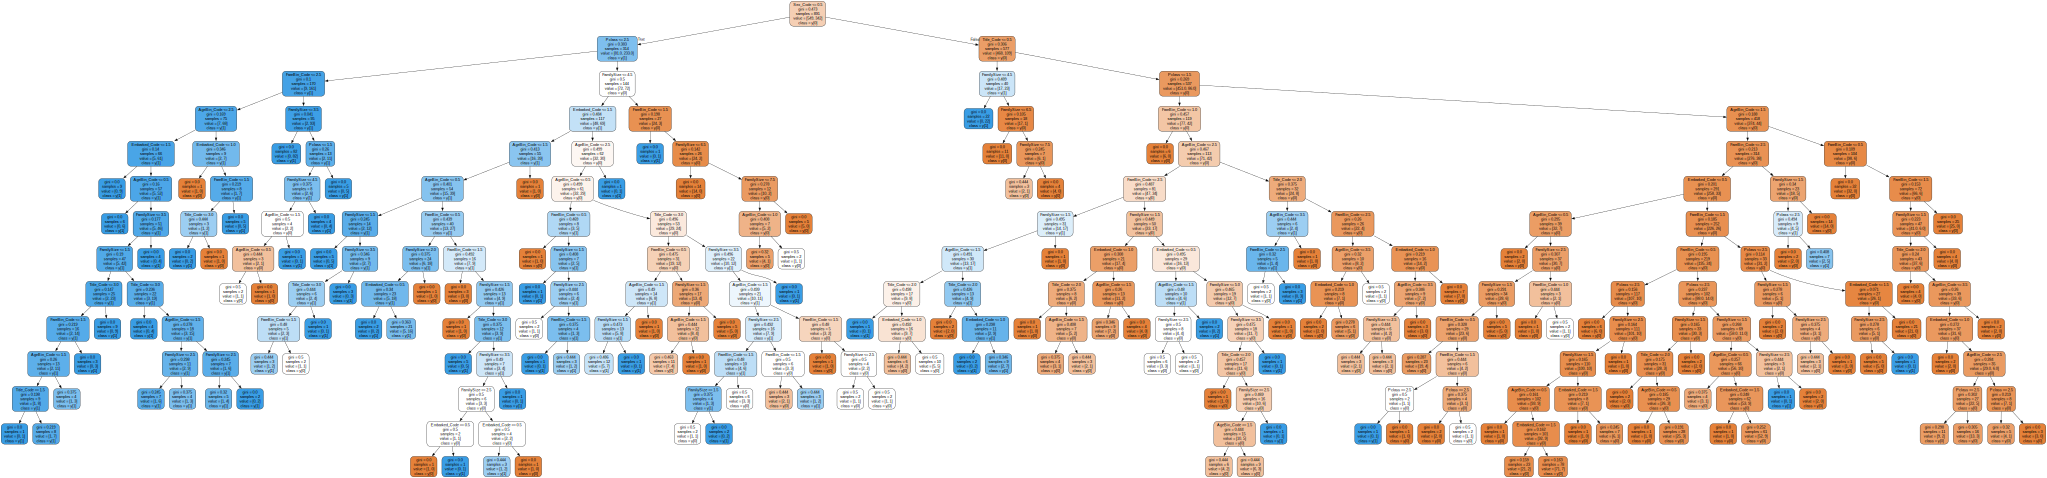

In [23]:
import graphviz 

dot_data = tree.export_graphviz(dtree, out_file=None, 
                                feature_names = data1_x_bin, class_names = True,
                                filled = True, rounded = True)
graph = graphviz.Source(dot_data) 
graph

In [25]:


# 集成学习

vote_est = [
    ('ada', ensemble.AdaBoostClassifier()),
    ('bc', ensemble.BaggingClassifier()),
    ('etc',ensemble.ExtraTreesClassifier()),
    ('gbc', ensemble.GradientBoostingClassifier()),
    ('rfc', ensemble.RandomForestClassifier()),

    ('gpc', gaussian_process.GaussianProcessClassifier()),
    
    ('lr', linear_model.LogisticRegressionCV()),
    
    ('bnb', naive_bayes.BernoulliNB()),
    ('gnb', naive_bayes.GaussianNB()),
    
    ('knn', neighbors.KNeighborsClassifier()),
    
    ('svc', svm.SVC(probability=True)),

   ('xgb', XGBClassifier())
]


# 硬投票(大多数)
vote_hard = ensemble.VotingClassifier(estimators = vote_est , voting = 'hard')
vote_hard_cv = model_selection.cross_validate(vote_hard, data1[data1_x_bin], data1[Target], cv = cv_split, return_train_score=True)
vote_hard.fit(data1[data1_x_bin], data1[Target])

print("Hard Voting Training w/bin score mean: {:.2f}". format(vote_hard_cv['train_score'].mean()*100)) 
print("Hard Voting Test w/bin score mean: {:.2f}". format(vote_hard_cv['test_score'].mean()*100))
print("Hard Voting Test w/bin score 3*std: +/- {:.2f}". format(vote_hard_cv['test_score'].std()*100*3))
print('-'*10)


# 软投票(加权投票)
vote_soft = ensemble.VotingClassifier(estimators = vote_est , voting = 'soft')
vote_soft_cv = model_selection.cross_validate(vote_soft, data1[data1_x_bin], data1[Target], cv = cv_split, return_train_score=True)
vote_soft.fit(data1[data1_x_bin], data1[Target])

print("Soft Voting Training w/bin score mean: {:.2f}". format(vote_soft_cv['train_score'].mean()*100)) 
print("Soft Voting Test w/bin score mean: {:.2f}". format(vote_soft_cv['test_score'].mean()*100))
print("Soft Voting Test w/bin score 3*std: +/- {:.2f}". format(vote_soft_cv['test_score'].std()*100*3))
print('-'*10)

Hard Voting Training w/bin score mean: 87.21
Hard Voting Test w/bin score mean: 82.09
Hard Voting Test w/bin score 3*std: +/- 3.91
----------
Soft Voting Training w/bin score mean: 87.75
Soft Voting Test w/bin score mean: 82.28
Soft Voting Test w/bin score 3*std: +/- 5.67
----------


In [26]:
# 矩阵搜索超参数
grid_n_estimator = [10, 50, 100, 300]
grid_ratio = [.1, .25, .5, .75, 1.0]
grid_learn = [.01, .03, .05, .1, .25]
grid_max_depth = [2, 4, 6, 8, 10, None]
grid_min_samples = [5, 10, .03, .05, .10]
grid_criterion = ['gini', 'entropy']
grid_bool = [True, False]
grid_seed = [0]


grid_param = [
            [{
                #AdaBoostClassifier
                'n_estimators': grid_n_estimator,
                'learning_rate': grid_learn,
                'random_state': grid_seed
            }],
       
    
            [{
                #BaggingClassifier
                'n_estimators': grid_n_estimator,
                'max_samples': grid_ratio,
                'random_state': grid_seed
             }],

    
            [{
            #ExtraTreesClassifier
            'n_estimators': grid_n_estimator, #default=10
            'criterion': grid_criterion, #default=”gini”
            'max_depth': grid_max_depth, #default=None
            'random_state': grid_seed
             }],


            [{
                #GradientBoostingClassifier
                'learning_rate': [.05],
                'n_estimators': [300],
                'max_depth': grid_max_depth,
                'random_state': grid_seed
             }],

    
            [{
                #RandomForestClassifier
                'n_estimators': grid_n_estimator,
                'criterion': grid_criterion,
                'max_depth': grid_max_depth,
                'oob_score': [True],
                'random_state': grid_seed
             }],
    
            [{    
                #GaussianProcessClassifier
                'max_iter_predict': grid_n_estimator,
                'random_state': grid_seed
            }],
        
    
            [{
                #LogisticRegressionCV
                'fit_intercept': grid_bool,
                'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
                'random_state': grid_seed
             }],
            
    
            [{
                #BernoulliNB
                'alpha': grid_ratio,
             }],
    
    
            #GaussianNB - 
            [{}],
    
            [{
                #KNeighborsClassifier
                'n_neighbors': [1,2,3,4,5,6,7],
                'weights': ['uniform', 'distance'],
                'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
            }],
            
    
            [{
                #SVC
                'C': [1,2,3,4,5],
                'gamma': grid_ratio,
                'decision_function_shape': ['ovo', 'ovr'],
                'probability': [True],
                'random_state': grid_seed
             }],

    
            [{
                #XGBClassifier
                'learning_rate': grid_learn,
                'max_depth': [1,2,4,6,8,10],
                'n_estimators': grid_n_estimator, 
                'seed': grid_seed  
             }]   
        ]



start_total = time.perf_counter()
for clf, param in zip (vote_est, grid_param):    

    start = time.perf_counter()        
    best_search = model_selection.GridSearchCV(estimator = clf[1], param_grid = param, cv = cv_split, scoring = 'roc_auc', return_train_score=True)
    best_search.fit(data1[data1_x_bin], data1[Target])
    run = time.perf_counter() - start

    best_param = best_search.best_params_
    print('The best parameter for {} is {} with a runtime of {:.2f} seconds.'.format(clf[1].__class__.__name__, best_param, run))
    clf[1].set_params(**best_param) 


run_total = time.perf_counter() - start_total
print('Total optimization time was {:.2f} minutes.'.format(run_total/60))

print('-'*10)

The best parameter for AdaBoostClassifier is {'learning_rate': 0.1, 'n_estimators': 300, 'random_state': 0} with a runtime of 23.00 seconds.
The best parameter for BaggingClassifier is {'max_samples': 0.25, 'n_estimators': 300, 'random_state': 0} with a runtime of 36.03 seconds.
The best parameter for ExtraTreesClassifier is {'criterion': 'entropy', 'max_depth': 6, 'n_estimators': 100, 'random_state': 0} with a runtime of 31.75 seconds.
The best parameter for GradientBoostingClassifier is {'learning_rate': 0.05, 'max_depth': 2, 'n_estimators': 300, 'random_state': 0} with a runtime of 30.91 seconds.
The best parameter for RandomForestClassifier is {'criterion': 'entropy', 'max_depth': 6, 'n_estimators': 100, 'oob_score': True, 'random_state': 0} with a runtime of 51.85 seconds.
The best parameter for GaussianProcessClassifier is {'max_iter_predict': 10, 'random_state': 0} with a runtime of 10.93 seconds.
The best parameter for LogisticRegressionCV is {'fit_intercept': True, 'random_sta

In [27]:
# 超参数微调后 硬投票
grid_hard = ensemble.VotingClassifier(estimators = vote_est , voting = 'hard')
grid_hard_cv = model_selection.cross_validate(grid_hard, data1[data1_x_bin], data1[Target], cv = cv_split, return_train_score=True)
grid_hard.fit(data1[data1_x_bin], data1[Target])

print("Hard Voting w/Tuned Hyperparameters Training w/bin score mean: {:.2f}". format(grid_hard_cv['train_score'].mean()*100)) 
print("Hard Voting w/Tuned Hyperparameters Test w/bin score mean: {:.2f}". format(grid_hard_cv['test_score'].mean()*100))
print("Hard Voting w/Tuned Hyperparameters Test w/bin score 3*std: +/- {:.2f}". format(grid_hard_cv['test_score'].std()*100*3))
print('-'*10)

# 超参数微调后 软投票
grid_soft = ensemble.VotingClassifier(estimators = vote_est , voting = 'soft')
grid_soft_cv = model_selection.cross_validate(grid_soft, data1[data1_x_bin], data1[Target], cv = cv_split, return_train_score=True)
grid_soft.fit(data1[data1_x_bin], data1[Target])

print("Soft Voting w/Tuned Hyperparameters Training w/bin score mean: {:.2f}". format(grid_soft_cv['train_score'].mean()*100)) 
print("Soft Voting w/Tuned Hyperparameters Test w/bin score mean: {:.2f}". format(grid_soft_cv['test_score'].mean()*100))
print("Soft Voting w/Tuned Hyperparameters Test w/bin score 3*std: +/- {:.2f}". format(grid_soft_cv['test_score'].std()*100*3))
print('-'*10)

Hard Voting w/Tuned Hyperparameters Training w/bin score mean: 85.34
Hard Voting w/Tuned Hyperparameters Test w/bin score mean: 82.35
Hard Voting w/Tuned Hyperparameters Test w/bin score 3*std: +/- 4.62
----------
Soft Voting w/Tuned Hyperparameters Training w/bin score mean: 84.83
Soft Voting w/Tuned Hyperparameters Test w/bin score mean: 82.28
Soft Voting w/Tuned Hyperparameters Test w/bin score 3*std: +/- 5.58
----------


In [28]:
print(data_val.info())
print("-"*10)


data_val['Survived'] = grid_hard.predict(data_val[data1_x_bin])


# 提交文件
submit = data_val[['PassengerId','Survived']]
submit.to_csv("./result/submit.csv", index=False)

print('测试集数据分布: \n', data_val['Survived'].value_counts(normalize = True))
submit.sample(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   PassengerId    418 non-null    int64   
 1   Pclass         418 non-null    int64   
 2   Name           418 non-null    object  
 3   Sex            418 non-null    object  
 4   Age            418 non-null    float64 
 5   SibSp          418 non-null    int64   
 6   Parch          418 non-null    int64   
 7   Ticket         418 non-null    object  
 8   Fare           418 non-null    float64 
 9   Cabin          91 non-null     object  
 10  Embarked       418 non-null    object  
 11  FamilySize     418 non-null    int64   
 12  IsAlone        418 non-null    int64   
 13  Title          418 non-null    object  
 14  FareBin        418 non-null    category
 15  AgeBin         418 non-null    category
 16  Sex_Code       418 non-null    int32   
 17  Embarked_Code  418 non-null    int3

,PassengerId,Survived
288,1180,0
206,1098,1
130,1022,0
143,1035,0
376,1268,1
212,1104,0
38,930,0
184,1076,1
140,1032,0
264,1156,0
